In [26]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid'

import plotly.express as px

In [27]:
from matplotlib.pyplot import figure

In [28]:
df = pd.read_csv("C:\\New folder\\Space_Corrected.csv")

In [29]:
df_rocket = df[['Company Name', 'Status Rocket']]

In [30]:
df_rocket_active = df_rocket[df_rocket['Status Rocket'] == 'StatusActive']
df_rocket_active = df_rocket_active.groupby('Company Name').count()
df_active = df_rocket_active.rename(columns= {'Status Rocket': 'StatusActive'})
df_active.head()

,StatusActive
Company Name,
AEB,3
Arianespace,114
Blue Origin,12
Boeing,1
CASC,211


In [31]:
df_rocket_retired = df_rocket[df_rocket['Status Rocket'] == 'StatusRetired']
df_rocket_retired = df_rocket_retired.groupby('Company Name').count()
df_retired = df_rocket_retired.rename(columns={'Status Rocket': 'StatusRetired'})
df_retired.head()

,StatusRetired
Company Name,
AMBA,8
ASI,9
Arianespace,165
Arm??e de l'Air,4
Boeing,135


In [32]:
df_final = pd.merge(df_active, df_retired, on='Company Name', how='outer')
df_final = df_final.fillna(0)
df_final['StatusActive'] = df_final['StatusActive'].astype('int')
df_final['StatusRetired'] = df_final['StatusRetired'].astype('int')
df_final['Total Rocket'] = df_final['StatusActive'] + df_final['StatusRetired']
df_final['% StatusActive'] = df_final['StatusActive'] / df_final['Total Rocket']
df_final['% StatusRetired'] = df_final['StatusRetired'] / df_final['Total Rocket']
df_final.sort_values(by=['% StatusActive'], inplace=True, ascending=False)
df_final.reset_index(inplace=True)
df_final.head(20)

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
0,AEB,3,0,3,1.000000,0.000000
1,Khrunichev,1,0,1,1.000000,0.000000
2,Blue Origin,12,0,12,1.000000,0.000000
3,i-Space,1,0,1,1.000000,0.000000
4,Sea Launch,36,0,36,1.000000,0.000000
5,Sandia,1,0,1,1.000000,0.000000
6,Virgin Orbit,1,0,1,1.000000,0.000000
7,ExPace,10,0,10,1.000000,0.000000
8,Exos,4,0,4,1.000000,0.000000
9,Rocket Lab,13,0,13,1.000000,0.000000


In [ ]:
#Companies with most no of active rockets..

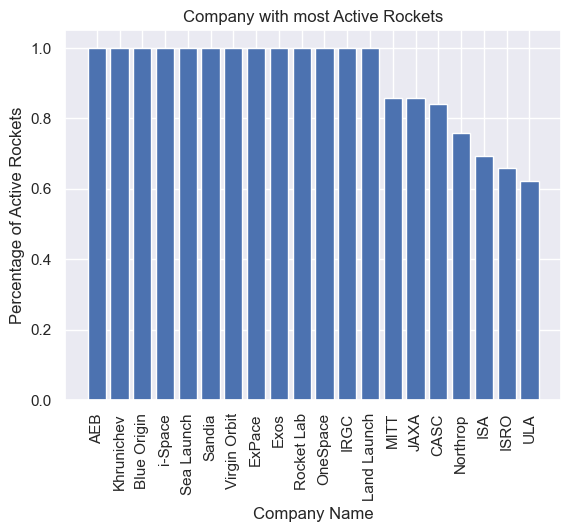

In [33]:
df_final_active_plot = df_final.head(20)

x = df_final_active_plot['Company Name']
y = df_final_active_plot['% StatusActive']

#figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Percentage of Active Rockets')
plt.title('Company with most Active Rockets')
plt.xticks(rotation=90)
plt.show()

In [25]:
#COMPANY WITH MOST RETIRED ROCKETS (with percent)

In [34]:
df_final.sort_values(by=['% StatusRetired'], inplace=True, ascending=False)
#df_final.reset_index(inplace=True)
df_final.head()

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
55,Yuzhmash,0,2,2,0.0,1.0
42,Lockheed,0,79,79,0.0,1.0
31,Landspace,0,1,1,0.0,1.0
32,UT,0,5,5,0.0,1.0
33,US Navy,0,17,17,0.0,1.0


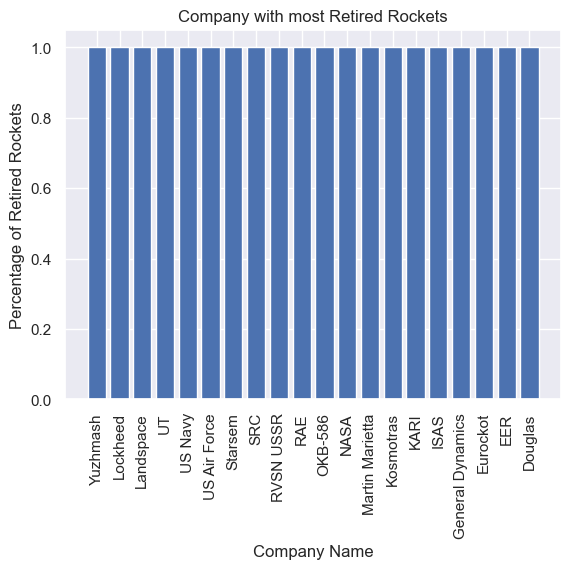

In [35]:
df_final_retired_plot = df_final.head(20)

x = df_final_retired_plot['Company Name']
y = df_final_retired_plot['% StatusRetired']

#figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Percentage of Retired Rockets')
plt.title('Company with most Retired Rockets')
plt.xticks(rotation=90)
plt.show()

In [36]:
#Visualisation of Year-Wise failed Missions of Companies

In [37]:
df_rocket = df[['Company Name', 'Status Mission']]
df_rocket_failur = df_rocket[df_rocket['Status Mission'] == 'Failure']
df_rocket_failur = df_rocket_failur.groupby('Company Name').count()
df_failur = df_rocket_failur.rename(columns= {'Status Mission': 'Failed Missions'})
df_failur.head()


,Failed Missions
Company Name,
AEB,2
AMBA,3
Arianespace,7
Boeing,3
CASC,14


In [38]:
df_rocket = df[['Company Name', 'Status Mission']]
df_rocket_success = df_rocket[df_rocket['Status Mission'] == 'Success']
df_rocket_success = df_rocket_success.groupby('Company Name').count()
df_success = df_rocket_success.rename(columns= {'Status Mission': 'Success Missions'})
df_success.head()


,Success Missions
Company Name,
AMBA,4
ASI,9
Arianespace,269
Arm??e de l'Air,3
Blue Origin,12


In [39]:
df_rocket_failure = df_rocket[df_rocket['Status Mission'] == 'Failure']
df_rocket_failure = df_rocket_failure.groupby('Company Name').count()
df_failure = df_rocket_failure.rename(columns={'Status Mission': 'Failure Missions'})
df_failure.head()

,Failure Missions
Company Name,
AEB,2
AMBA,3
Arianespace,7
Boeing,3
CASC,14


In [41]:
df_final = pd.merge(df_success, df_failure, on='Company Name', how='outer')
df_final = df_final.fillna(0)
df_final['Success Missions'] = df_final['Success Missions'].astype('int')
df_final['Failure Missions'] = df_final['Failure Missions'].astype('int')
df_final['Total Missions'] = df_final['Success Missions'] + df_final['Failure Missions']
#df_final['% StatusActive'] = df_final['StatusActive'] / df_final['Total Rocket']
#df_final['% StatusRetired'] = df_final['StatusRetired'] / df_final['Total Rocket']
df_final.sort_values(by=['Failure Missions'], inplace=True, ascending=False)
df_final.reset_index(inplace=True)
df_final.head(20)

,Company Name,Success Missions,Failure Missions,Total Missions
0,RVSN USSR,1614,121,1735
1,General Dynamics,203,37,240
2,US Air Force,129,30,159
3,CASC,231,14,245
4,US Navy,2,14,16
5,Martin Marietta,100,11,111
6,NASA,186,11,197
7,ISRO,63,8,71
8,ISA,4,8,12
9,Arianespace,269,7,276


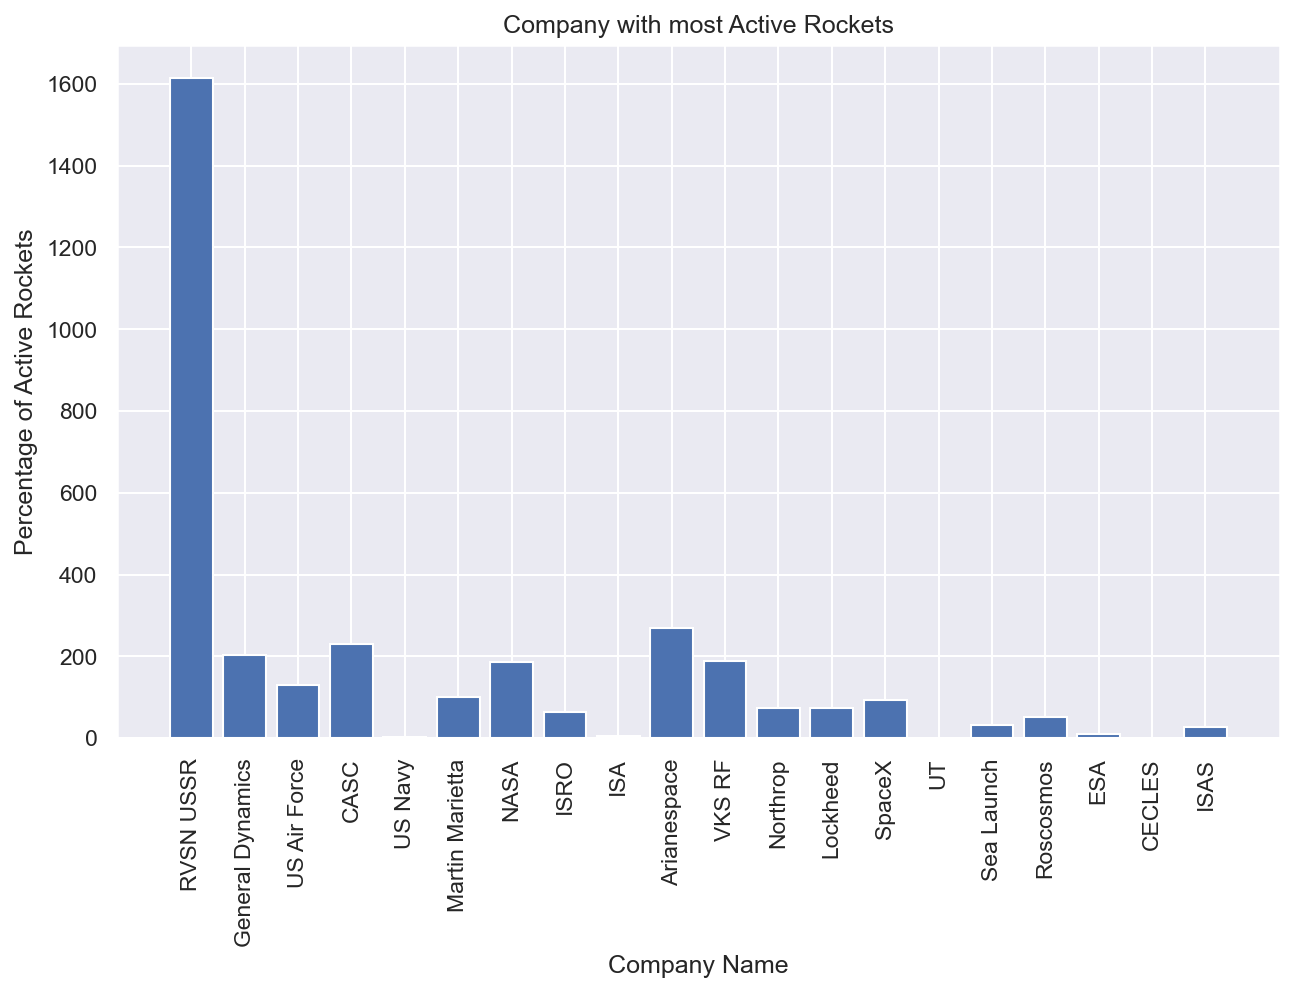

In [42]:
df_final_active_plot = df_final.head(20)

x = df_final_active_plot['Company Name']
y = df_final_active_plot['Success Missions']

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Successfull missions')
plt.title('Company with mostsuccessfull missions')
plt.xticks(rotation=90)
plt.show()

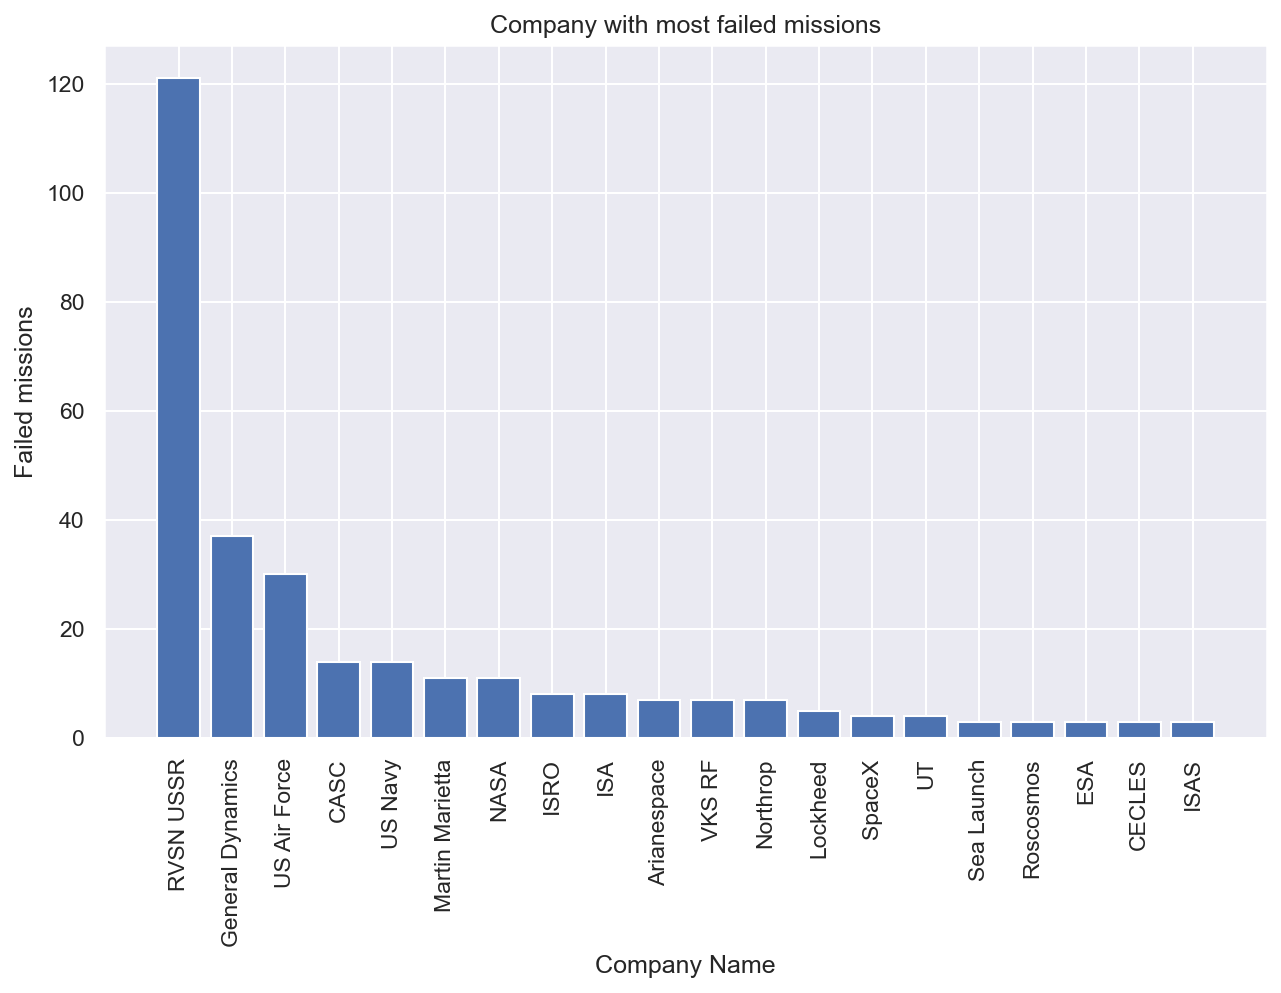

In [43]:
df_final_active_plot = df_final.head(20)

x = df_final_active_plot['Company Name']
y = df_final_active_plot['Failure Missions']

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Failed missions')
plt.title('Company with most failed missions')
plt.xticks(rotation=90)
plt.show()

In [48]:
#Visualisation of Year-wise failed missions of Companies

In [45]:
df['DateTime'] = pd.to_datetime(df['Datum']) 
df['Year'] = df['DateTime'].apply(lambda datetime: datetime.year)

In [46]:
df_rocket = df[['Year', 'Status Mission']]
df_rocket_failure = df_rocket[df_rocket['Status Mission'] == 'Failure']
df_rocket_failure = df_rocket_failure.groupby('Year').count()

df_rocket_failure = df_rocket_failure.rename(columns={'Status Mission':'Failed Missions'})
df_rocket_failure.reset_index(inplace=True)
df_rocket_failure.head()

,Year,Failed Missions
0,1957,1
1,1958,20
2,1959,9
3,1960,20
4,1961,17


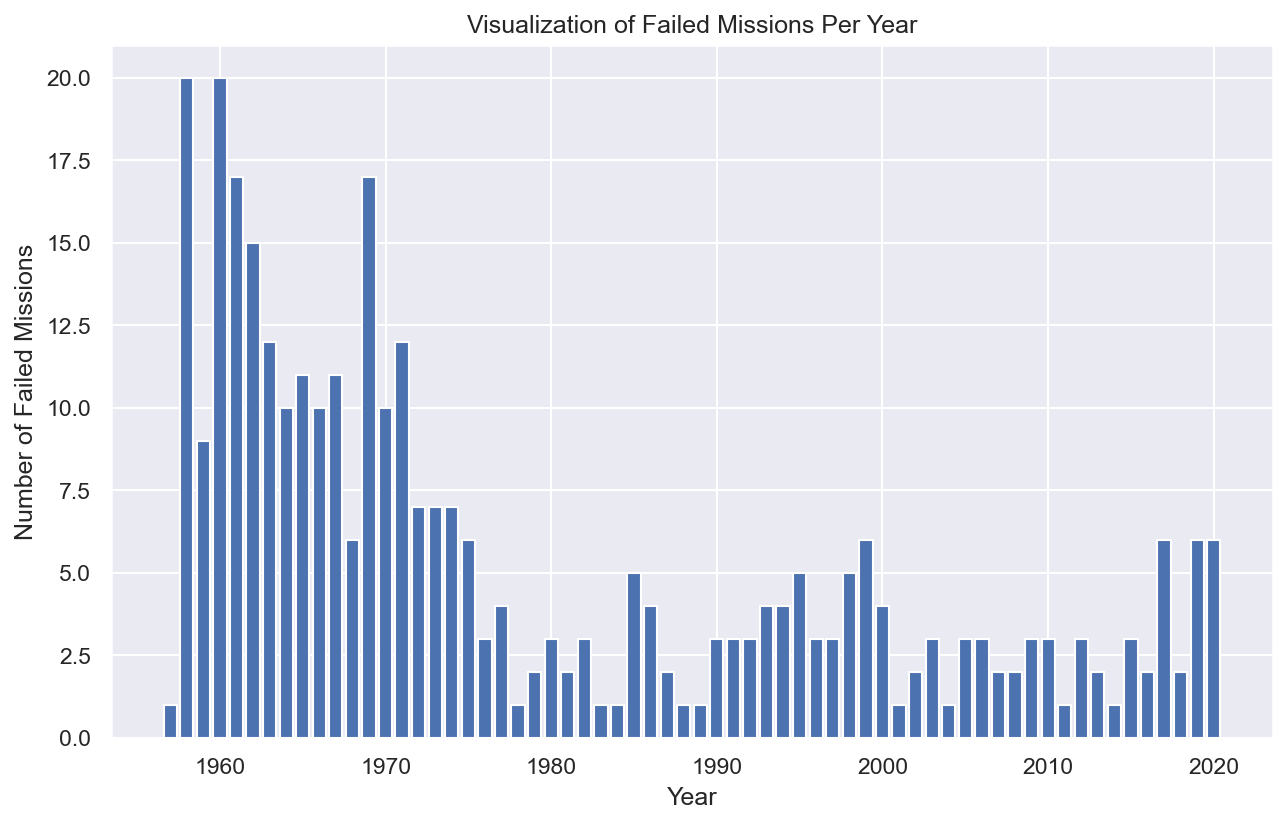

In [47]:
figure(figsize=(10, 6), dpi=150)
plt.bar(df_rocket_failure['Year'], df_rocket_failure['Failed Missions'])
plt.xlabel('Year')
plt.ylabel('Number of Failed Missions')
plt.title('Visualization of Failed Missions Per Year')
plt.show()